In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

from sklearn.datasets import *

In [2]:
def plot_outliers_with_valid_samples(X_valid, X_outliers, filename):
    plt.scatter(X_valid[:, 0], X_valid[:, 1], c="#8ac926", label="Valid Samples")
    plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="#ff595e", label="Outliers")
    plt.grid()
    plt.legend(loc="best")
    plt.text(-2, 13, filename, fontsize=15)
    plt.savefig(filename+".png")
    
    plt.show()
    plt.clf()

Dataset Size :  (1000, 2) (1000,)


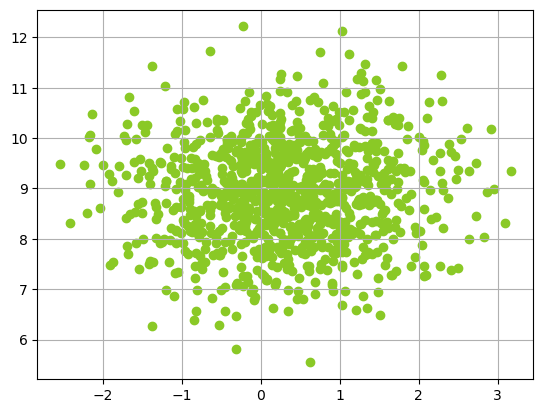

In [3]:
X, Y = make_blobs(n_samples=1000, n_features=2, centers=1, random_state=23)
print("Dataset Size : ", X.shape, Y.shape)
plt.scatter(X[:, 0], X[:, 1], c="#8ac926")
plt.grid()
plt.savefig("firstfirst.png")
plt.show()

In [4]:
from sklearn.neighbors import KernelDensity


kde = KernelDensity(kernel='gaussian')
kde.fit(X)

KernelDensity()

In [5]:
kde_X = kde.score_samples(X)
kde_X[:5]  
from scipy.stats.mstats import mquantiles

alpha_set = 0.95
tau_kde = mquantiles(kde_X, 1. - alpha_set)

tau_kde

array([-4.06041319])

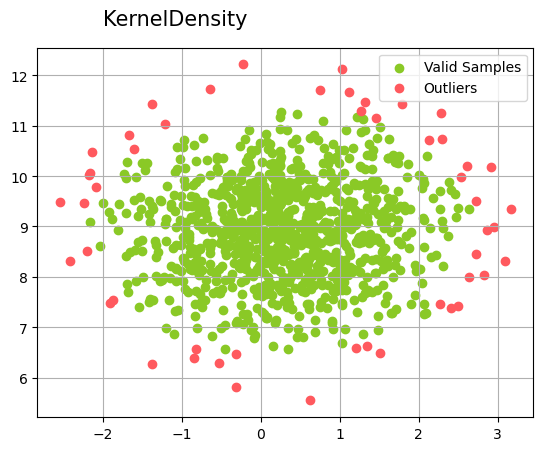

<Figure size 640x480 with 0 Axes>

In [6]:
outliers = np.argwhere(kde_X < tau_kde)
outliers = outliers.flatten()
X_outliers = X[outliers]

normal_samples = np.argwhere(kde_X >= tau_kde)
normal_samples = normal_samples.flatten()
X_valid = X[normal_samples]

plot_outliers_with_valid_samples(X_valid, X_outliers, "KernelDensity")


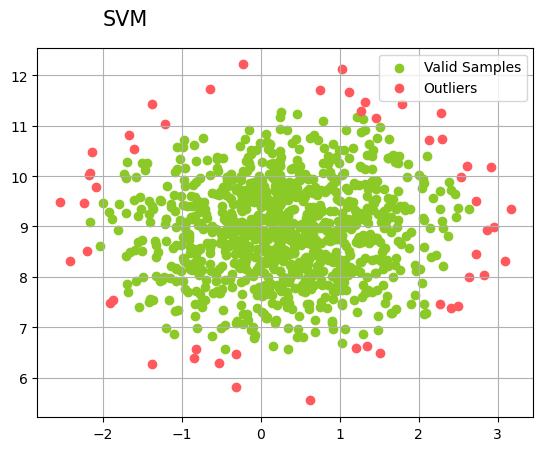

<Figure size 640x480 with 0 Axes>

In [7]:
from sklearn.svm import OneClassSVM

nu = 0.05

ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu)
ocsvm.fit(X)

preds = ocsvm.predict(X)
preds[:10]

plot_outliers_with_valid_samples(X_valid, X_outliers, "SVM")

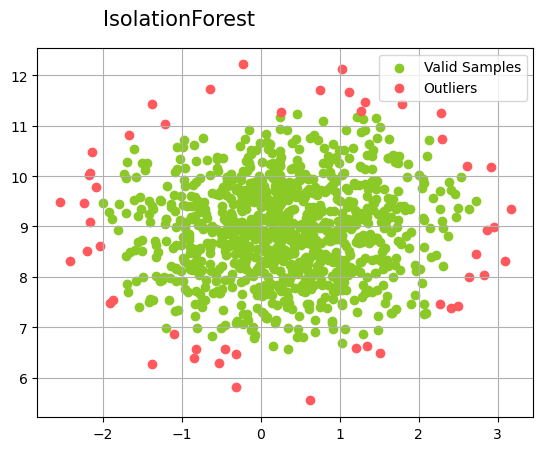

<Figure size 640x480 with 0 Axes>

In [8]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=300, contamination=0.05)
iforest.fit(X)

preds = iforest.predict(X)
preds[:10]

X_outliers = X[preds == -1]
X_valid = X[preds != -1]

plot_outliers_with_valid_samples(X_valid, X_outliers, "IsolationForest")

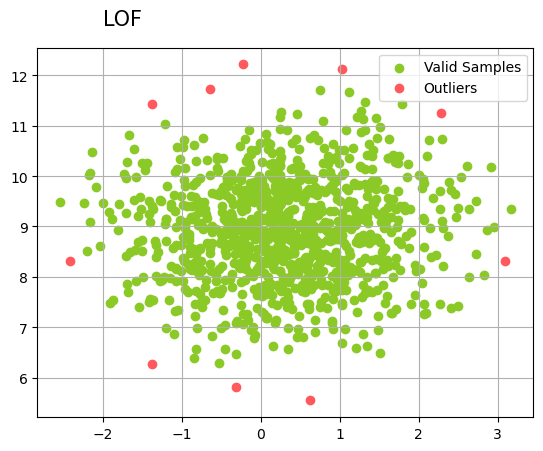

<Figure size 640x480 with 0 Axes>

In [9]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()

preds = lof.fit_predict(X)
preds[:10]

X_outliers = X[preds == -1]
X_valid = X[preds != -1]

plot_outliers_with_valid_samples(X_valid, X_outliers, "LOF")